# Cardiovascular Disease Analysis - Hypothesis Testing

## Dataset Overview
This notebook performs comprehensive hypothesis testing on cardiovascular disease data including:
1. One-sample hypothesis test
2. Two-sample hypothesis test  
3. One-way ANOVA with post-hoc tests

## Dataset Information
- **Source**: cardio_train.csv
- **Size**: 70,000 records with 13 variables
- **Variables**: id, age, gender, height, weight, ap_hi (systolic BP), ap_lo (diastolic BP), cholesterol, gluc (glucose), smoke, alco, active, cardio


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_1samp, ttest_ind, f_oneway, tukey_hsd
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:
# Load and explore the dataset
df = pd.read_csv('cardio_train.csv', sep=';')

print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nData Types:")
print(df.dtypes)
print("\nFirst 5 rows:")
df.head()


Dataset Shape: (70000, 13)

Column Names:
['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

Data Types:
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

First 5 rows:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# Data preprocessing and cleaning
print("Basic Statistics:")
print(df.describe())

# Convert age from days to years
df['age_years'] = df['age'] / 365.25

# Create BMI
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

# Convert categorical variables to meaningful labels
df['gender_label'] = df['gender'].map({1: 'Female', 2: 'Male'})
df['cholesterol_label'] = df['cholesterol'].map({1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'})
df['gluc_label'] = df['gluc'].map({1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'})
df['smoke_label'] = df['smoke'].map({0: 'Non-smoker', 1: 'Smoker'})
df['alco_label'] = df['alco'].map({0: 'Non-drinker', 1: 'Drinker'})
df['active_label'] = df['active'].map({0: 'Inactive', 1: 'Active'})
df['cardio_label'] = df['cardio'].map({0: 'No CVD', 1: 'CVD'})

print("\nAfter preprocessing:")
print("Age range (years):", df['age_years'].min(), "-", df['age_years'].max())
print("BMI range:", df['bmi'].min(), "-", df['bmi'].max())
print("Blood pressure ranges:")
print("Systolic (ap_hi):", df['ap_hi'].min(), "-", df['ap_hi'].max())
print("Diastolic (ap_lo):", df['ap_lo'].min(), "-", df['ap_lo'].max())


Basic Statistics:
                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530

## 1. One-Sample Hypothesis Test

**Research Question**: Does the mean systolic blood pressure (ap_hi) differ significantly from the standard normal value of 120 mmHg?

**Hypothesis**:
- H₀: μ = 120 mmHg (mean systolic BP equals standard value)
- H₁: μ ≠ 120 mmHg (mean systolic BP differs from standard value)

**Medical Reference**: Normal systolic blood pressure is considered to be around 120 mmHg according to medical guidelines.


In [5]:
# One-sample t-test for systolic blood pressure
# Testing if mean differs from 120 mmHg (normal value)

# Remove outliers (values that seem unrealistic)
bp_data = df['ap_hi'][(df['ap_hi'] >= 80) & (df['ap_hi'] <= 250)]
print(f"Sample size after removing outliers: {len(bp_data)}")
print(f"Mean systolic BP: {bp_data.mean():.2f} mmHg")
print(f"Standard deviation: {bp_data.std():.2f} mmHg")
print(f"Standard error: {bp_data.std() / np.sqrt(len(bp_data)):.2f} mmHg")

# Perform one-sample t-test
test_value = 120  # Normal systolic BP
t_stat, p_value = ttest_1samp(bp_data, test_value)

print(f"\nOne-Sample T-Test Results:")
print(f"Test statistic (t): {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Degrees of freedom: {len(bp_data) - 1}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print(f"\nConclusion: Reject H₀ (p < {alpha})")
    print("The mean systolic blood pressure significantly differs from 120 mmHg")
else:
    print(f"\nConclusion: Fail to reject H₀ (p ≥ {alpha})")
    print("The mean systolic blood pressure does not significantly differ from 120 mmHg")

# Calculate confidence interval
confidence_level = 0.95
degrees_freedom = len(bp_data) - 1
mean_bp = bp_data.mean()
std_error = bp_data.std() / np.sqrt(len(bp_data))
margin_error = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom) * std_error

ci_lower = mean_bp - margin_error
ci_upper = mean_bp + margin_error

print(f"\n95% Confidence Interval for mean systolic BP:")
print(f"[{ci_lower:.2f}, {ci_upper:.2f}] mmHg")


Sample size after removing outliers: 69753
Mean systolic BP: 127.02 mmHg
Standard deviation: 17.07 mmHg
Standard error: 0.06 mmHg

One-Sample T-Test Results:
Test statistic (t): 108.5593
P-value: 0.000000
Degrees of freedom: 69752

Conclusion: Reject H₀ (p < 0.05)
The mean systolic blood pressure significantly differs from 120 mmHg

95% Confidence Interval for mean systolic BP:
[126.89, 127.14] mmHg


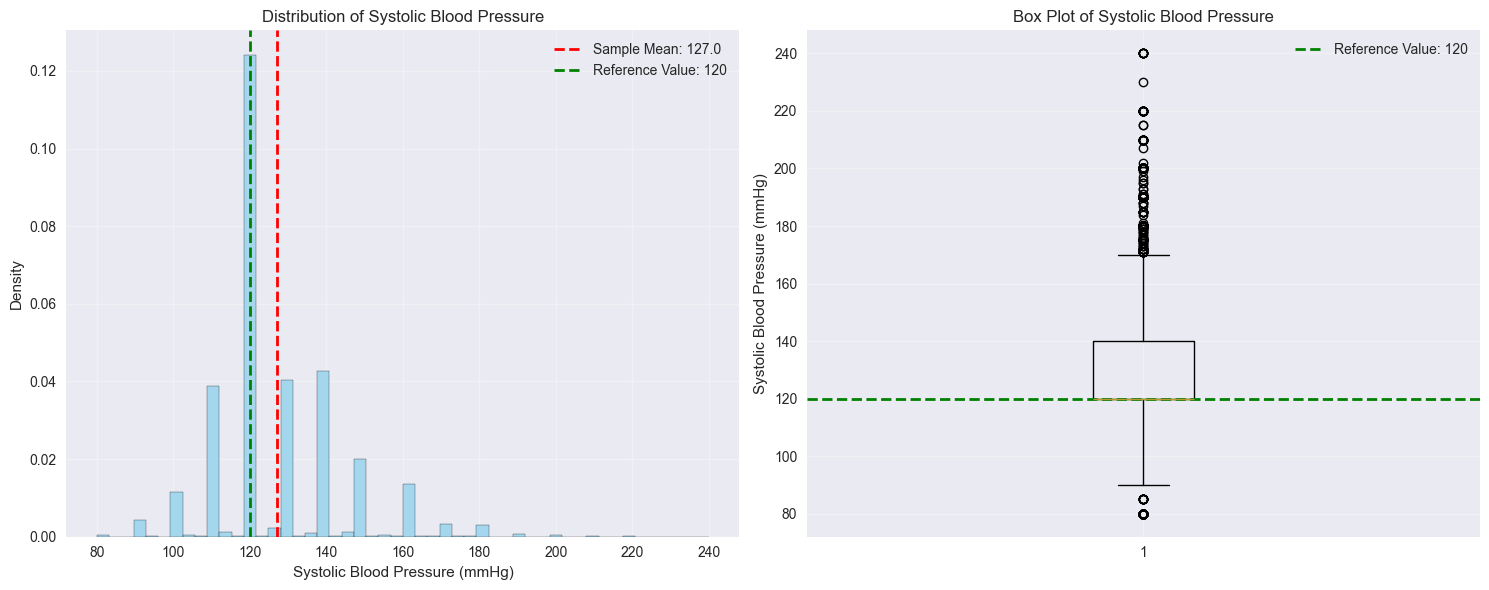

In [6]:
# Visualization for one-sample test
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histogram with normal curve overlay
ax1.hist(bp_data, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
ax1.axvline(bp_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Sample Mean: {bp_data.mean():.1f}')
ax1.axvline(120, color='green', linestyle='--', linewidth=2, label='Reference Value: 120')
ax1.set_xlabel('Systolic Blood Pressure (mmHg)')
ax1.set_ylabel('Density')
ax1.set_title('Distribution of Systolic Blood Pressure')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Box plot
ax2.boxplot(bp_data, vert=True)
ax2.axhline(120, color='green', linestyle='--', linewidth=2, label='Reference Value: 120')
ax2.set_ylabel('Systolic Blood Pressure (mmHg)')
ax2.set_title('Box Plot of Systolic Blood Pressure')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 2. Two-Sample Hypothesis Test

**Research Question**: Does the mean BMI differ significantly between males and females?

**Hypothesis**:
- H₀: μ₁ = μ₂ (mean BMI is equal between males and females)
- H₁: μ₁ ≠ μ₂ (mean BMI differs between males and females)

**Medical Relevance**: BMI differences between genders can indicate different body composition patterns and health risks.


In [7]:
# Two-sample t-test for BMI between genders
# Remove unrealistic BMI values
bmi_data = df[(df['bmi'] >= 15) & (df['bmi'] <= 60)].copy()

# Separate data by gender
male_bmi = bmi_data[bmi_data['gender'] == 2]['bmi']
female_bmi = bmi_data[bmi_data['gender'] == 1]['bmi']

print("Sample sizes:")
print(f"Males: {len(male_bmi)}")
print(f"Females: {len(female_bmi)}")

print(f"\nDescriptive Statistics:")
print(f"Male BMI - Mean: {male_bmi.mean():.2f}, Std: {male_bmi.std():.2f}")
print(f"Female BMI - Mean: {female_bmi.mean():.2f}, Std: {female_bmi.std():.2f}")

# Check for normality (Shapiro-Wilk test on sample)
print(f"\nNormality Tests (Shapiro-Wilk):")
male_shapiro = stats.shapiro(male_bmi.sample(5000))  # Sample for computational efficiency
female_shapiro = stats.shapiro(female_bmi.sample(5000))
print(f"Male BMI: W = {male_shapiro.statistic:.4f}, p = {male_shapiro.pvalue:.6f}")
print(f"Female BMI: W = {female_shapiro.statistic:.4f}, p = {female_shapiro.pvalue:.6f}")

# Perform two-sample t-test
t_stat, p_value = ttest_ind(male_bmi, female_bmi, equal_var=False)  # Welch's t-test

print(f"\nTwo-Sample T-Test Results (Welch's t-test):")
print(f"Test statistic (t): {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Degrees of freedom: {len(male_bmi) + len(female_bmi) - 2}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print(f"\nConclusion: Reject H₀ (p < {alpha})")
    print("The mean BMI significantly differs between males and females")
else:
    print(f"\nConclusion: Fail to reject H₀ (p ≥ {alpha})")
    print("The mean BMI does not significantly differ between males and females")

# Effect size (Cohen's d)
pooled_std = np.sqrt(((len(male_bmi) - 1) * male_bmi.var() + (len(female_bmi) - 1) * female_bmi.var()) / 
                     (len(male_bmi) + len(female_bmi) - 2))
cohens_d = (male_bmi.mean() - female_bmi.mean()) / pooled_std
print(f"\nEffect Size (Cohen's d): {cohens_d:.4f}")

if abs(cohens_d) < 0.2:
    effect_size = "small"
elif abs(cohens_d) < 0.5:
    effect_size = "medium"
else:
    effect_size = "large"
print(f"Effect size interpretation: {effect_size}")


Sample sizes:
Males: 24444
Females: 45463

Descriptive Statistics:
Male BMI - Mean: 26.70, Std: 4.41
Female BMI - Mean: 27.91, Std: 5.57

Normality Tests (Shapiro-Wilk):
Male BMI: W = 0.9396, p = 0.000000
Female BMI: W = 0.9440, p = 0.000000

Two-Sample T-Test Results (Welch's t-test):
Test statistic (t): -31.4860
P-value: 0.000000
Degrees of freedom: 69905

Conclusion: Reject H₀ (p < 0.05)
The mean BMI significantly differs between males and females

Effect Size (Cohen's d): -0.2331
Effect size interpretation: medium


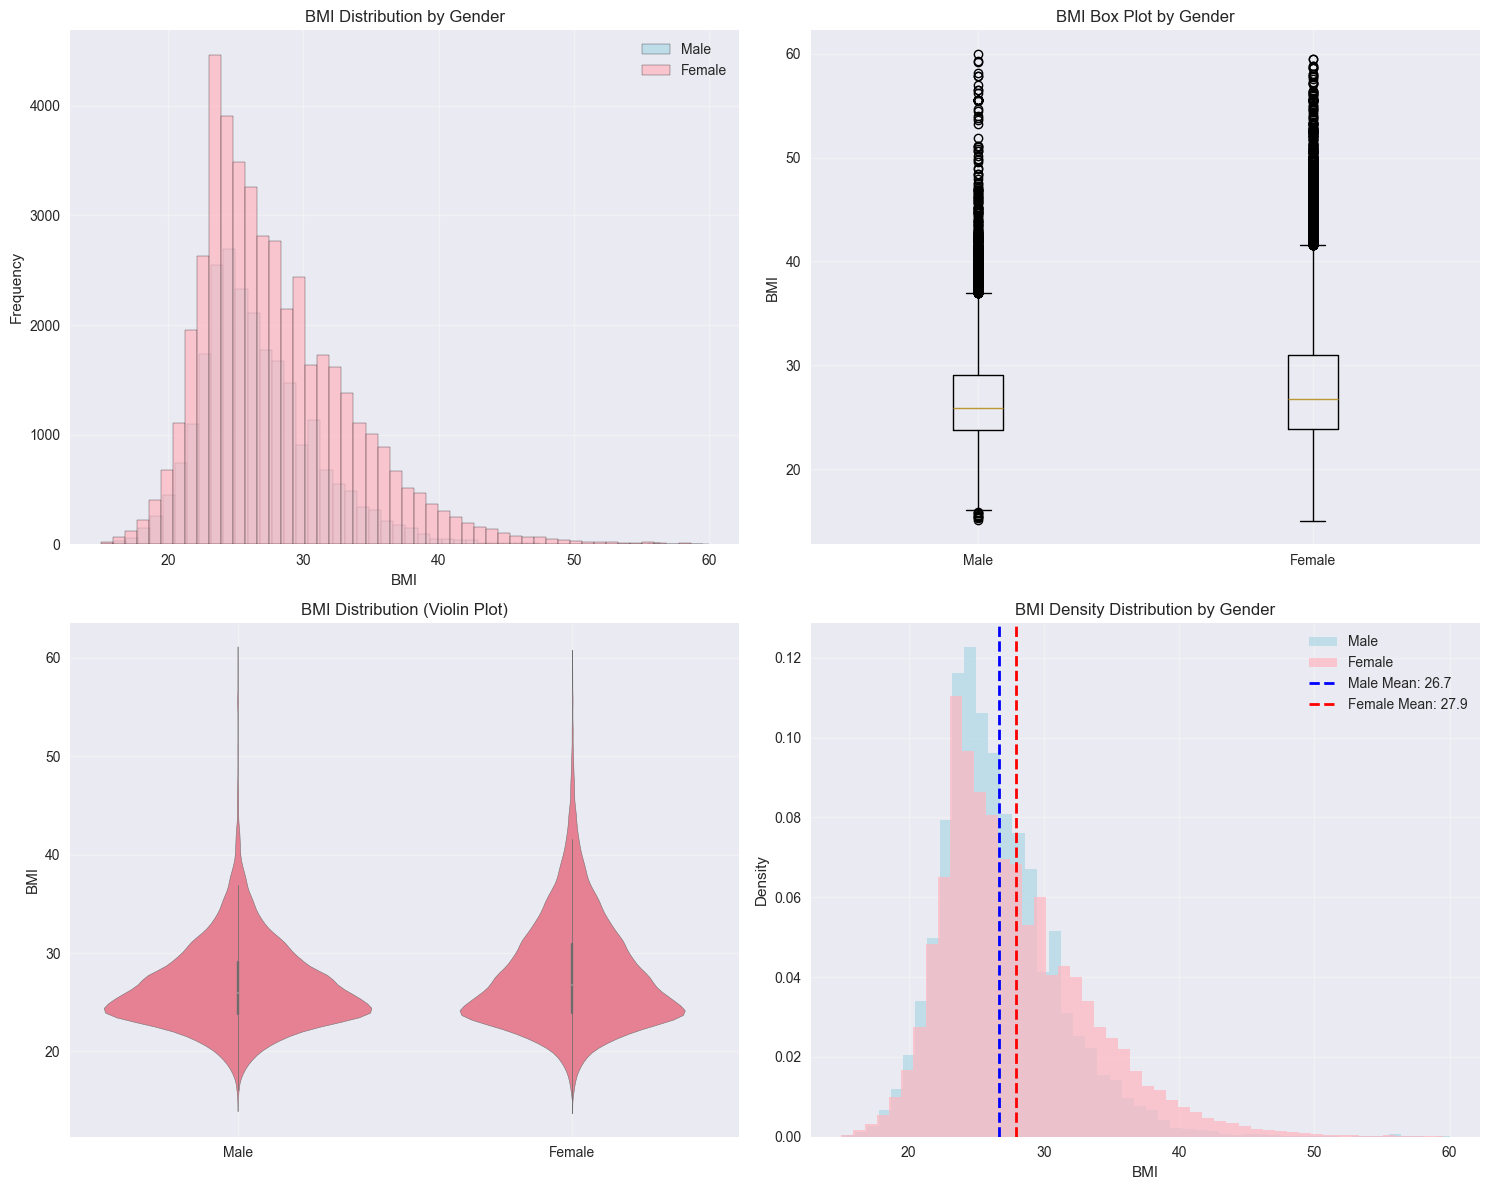

In [8]:
# Visualization for two-sample test
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Histograms
ax1.hist(male_bmi, bins=50, alpha=0.7, label='Male', color='lightblue', edgecolor='black')
ax1.hist(female_bmi, bins=50, alpha=0.7, label='Female', color='lightpink', edgecolor='black')
ax1.set_xlabel('BMI')
ax1.set_ylabel('Frequency')
ax1.set_title('BMI Distribution by Gender')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Box plots
gender_data = [male_bmi, female_bmi]
ax2.boxplot(gender_data, labels=['Male', 'Female'])
ax2.set_ylabel('BMI')
ax2.set_title('BMI Box Plot by Gender')
ax2.grid(True, alpha=0.3)

# Violin plots
gender_labels = ['Male'] * len(male_bmi) + ['Female'] * len(female_bmi)
bmi_values = list(male_bmi) + list(female_bmi)
sns.violinplot(x=gender_labels, y=bmi_values, ax=ax3)
ax3.set_ylabel('BMI')
ax3.set_title('BMI Distribution (Violin Plot)')
ax3.grid(True, alpha=0.3)

# Density plots
ax4.hist(male_bmi, bins=50, density=True, alpha=0.7, label='Male', color='lightblue')
ax4.hist(female_bmi, bins=50, density=True, alpha=0.7, label='Female', color='lightpink')
ax4.axvline(male_bmi.mean(), color='blue', linestyle='--', linewidth=2, label=f'Male Mean: {male_bmi.mean():.1f}')
ax4.axvline(female_bmi.mean(), color='red', linestyle='--', linewidth=2, label=f'Female Mean: {female_bmi.mean():.1f}')
ax4.set_xlabel('BMI')
ax4.set_ylabel('Density')
ax4.set_title('BMI Density Distribution by Gender')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 3. One-Way ANOVA

**Research Question**: Do the means of diastolic blood pressure (ap_lo) differ significantly across different cholesterol levels?

**Hypothesis**:
- H₀: μ₁ = μ₂ = μ₃ (mean diastolic BP is equal across all cholesterol levels)
- H₁: At least one mean differs (mean diastolic BP differs across cholesterol levels)

**Groups**:
- Group 1: Normal cholesterol (cholesterol = 1)
- Group 2: Above normal cholesterol (cholesterol = 2)  
- Group 3: Well above normal cholesterol (cholesterol = 3)

**Medical Relevance**: Higher cholesterol levels are associated with cardiovascular risk factors including blood pressure changes.


In [9]:
# One-way ANOVA for diastolic BP across cholesterol levels
# Remove unrealistic diastolic BP values
bp_data_anova = df[(df['ap_lo'] >= 50) & (df['ap_lo'] <= 150)].copy()

# Create groups based on cholesterol levels
group1 = bp_data_anova[bp_data_anova['cholesterol'] == 1]['ap_lo']  # Normal
group2 = bp_data_anova[bp_data_anova['cholesterol'] == 2]['ap_lo']  # Above normal
group3 = bp_data_anova[bp_data_anova['cholesterol'] == 3]['ap_lo']  # Well above normal

print("Sample sizes for each group:")
print(f"Normal cholesterol: {len(group1)}")
print(f"Above normal cholesterol: {len(group2)}")
print(f"Well above normal cholesterol: {len(group3)}")

print(f"\nDescriptive Statistics:")
print(f"Normal cholesterol - Mean: {group1.mean():.2f}, Std: {group1.std():.2f}")
print(f"Above normal cholesterol - Mean: {group2.mean():.2f}, Std: {group2.std():.2f}")
print(f"Well above normal cholesterol - Mean: {group3.mean():.2f}, Std: {group3.std():.2f}")

# Check assumptions
print(f"\nAssumption Checks:")

# 1. Normality test (Shapiro-Wilk on samples)
print("Normality Tests (Shapiro-Wilk on samples):")
shapiro1 = stats.shapiro(group1.sample(5000))
shapiro2 = stats.shapiro(group2.sample(5000))
shapiro3 = stats.shapiro(group3.sample(5000))
print(f"Normal cholesterol: W = {shapiro1.statistic:.4f}, p = {shapiro1.pvalue:.6f}")
print(f"Above normal cholesterol: W = {shapiro2.statistic:.4f}, p = {shapiro2.pvalue:.6f}")
print(f"Well above normal cholesterol: W = {shapiro3.statistic:.4f}, p = {shapiro3.pvalue:.6f}")

# 2. Homogeneity of variance (Levene's test)
levene_stat, levene_p = stats.levene(group1, group2, group3)
print(f"\nHomogeneity of Variance (Levene's test):")
print(f"Levene statistic: {levene_stat:.4f}, p-value: {levene_p:.6f}")

# Perform one-way ANOVA
f_stat, p_value = f_oneway(group1, group2, group3)

print(f"\nOne-Way ANOVA Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Degrees of freedom (between groups): 2")
print(f"Degrees of freedom (within groups): {len(group1) + len(group2) + len(group3) - 3}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print(f"\nConclusion: Reject H₀ (p < {alpha})")
    print("The mean diastolic blood pressure significantly differs across cholesterol levels")
else:
    print(f"\nConclusion: Fail to reject H₀ (p ≥ {alpha})")
    print("The mean diastolic blood pressure does not significantly differ across cholesterol levels")

# Calculate effect size (eta-squared)
ss_between = sum([len(group) * (group.mean() - bp_data_anova['ap_lo'].mean())**2 for group in [group1, group2, group3]])
ss_total = sum([(x - bp_data_anova['ap_lo'].mean())**2 for x in bp_data_anova['ap_lo']])
eta_squared = ss_between / ss_total
print(f"\nEffect Size (η²): {eta_squared:.4f}")

if eta_squared < 0.01:
    effect_size = "small"
elif eta_squared < 0.06:
    effect_size = "medium"
else:
    effect_size = "large"
print(f"Effect size interpretation: {effect_size}")


Sample sizes for each group:
Normal cholesterol: 51715
Above normal cholesterol: 9340
Well above normal cholesterol: 7890

Descriptive Statistics:
Normal cholesterol - Mean: 80.52, Std: 9.16
Above normal cholesterol - Mean: 83.13, Std: 10.58
Well above normal cholesterol - Mean: 84.85, Std: 9.60

Assumption Checks:
Normality Tests (Shapiro-Wilk on samples):
Normal cholesterol: W = 0.8746, p = 0.000000
Above normal cholesterol: W = 0.9147, p = 0.000000
Well above normal cholesterol: W = 0.8783, p = 0.000000

Homogeneity of Variance (Levene's test):
Levene statistic: 381.0747, p-value: 0.000000

One-Way ANOVA Results:
F-statistic: 911.6897
P-value: 0.000000
Degrees of freedom (between groups): 2
Degrees of freedom (within groups): 68942

Conclusion: Reject H₀ (p < 0.05)
The mean diastolic blood pressure significantly differs across cholesterol levels

Effect Size (η²): 0.0258
Effect size interpretation: medium


In [10]:
# Post-hoc tests (Tukey HSD) if ANOVA is significant
if p_value < 0.05:
    print("Post-hoc Analysis (Tukey HSD):")
    
    # Prepare data for Tukey HSD
    tukey_data = []
    tukey_labels = []
    
    for i, group in enumerate([group1, group2, group3], 1):
        tukey_data.extend(group)
        tukey_labels.extend([f'Group {i}'] * len(group))
    
    # Perform Tukey HSD test
    tukey_result = tukey_hsd(group1, group2, group3)
    
    print("Tukey HSD Results:")
    print("Group comparisons:")
    group_names = ['Normal', 'Above Normal', 'Well Above Normal']
    
    comparisons = [
        (0, 1, "Normal vs Above Normal"),
        (0, 2, "Normal vs Well Above Normal"), 
        (1, 2, "Above Normal vs Well Above Normal")
    ]
    
    for i, j, comparison_name in comparisons:
        mean_diff = tukey_result.statistic[i, j]
        p_val = tukey_result.pvalue[i, j]
        print(f"{comparison_name}: Mean difference = {mean_diff:.3f}, p-value = {p_val:.6f}")
        
        if p_val < 0.05:
            print(f"  → Significant difference (p < 0.05)")
        else:
            print(f"  → No significant difference (p ≥ 0.05)")
        print()
else:
    print("ANOVA was not significant, so post-hoc tests are not needed.")


Post-hoc Analysis (Tukey HSD):
Tukey HSD Results:
Group comparisons:
Normal vs Above Normal: Mean difference = -2.607, p-value = 0.000000
  → Significant difference (p < 0.05)

Normal vs Well Above Normal: Mean difference = -4.327, p-value = 0.000000
  → Significant difference (p < 0.05)

Above Normal vs Well Above Normal: Mean difference = -1.720, p-value = 0.000000
  → Significant difference (p < 0.05)



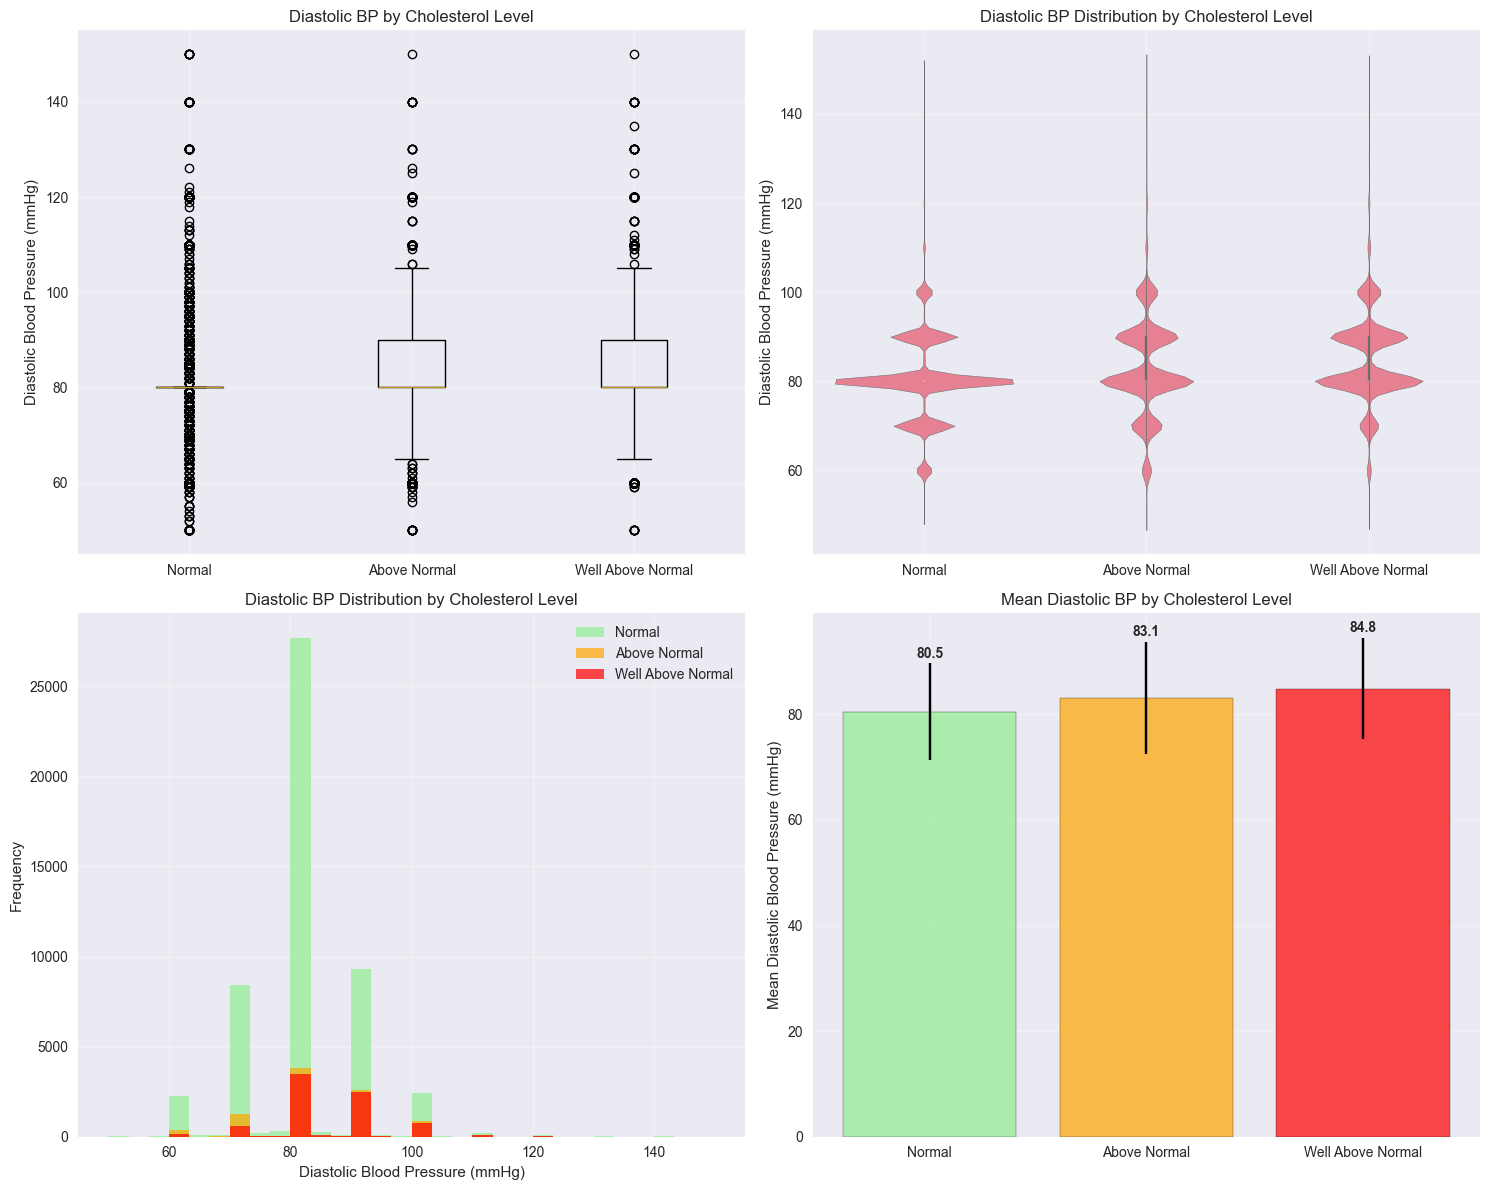

In [11]:
# Visualization for ANOVA
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Box plots for each group
groups_data = [group1, group2, group3]
group_labels = ['Normal', 'Above Normal', 'Well Above Normal']
ax1.boxplot(groups_data, labels=group_labels)
ax1.set_ylabel('Diastolic Blood Pressure (mmHg)')
ax1.set_title('Diastolic BP by Cholesterol Level')
ax1.grid(True, alpha=0.3)

# Violin plots
all_data = list(group1) + list(group2) + list(group3)
all_labels = ['Normal'] * len(group1) + ['Above Normal'] * len(group2) + ['Well Above Normal'] * len(group3)
sns.violinplot(x=all_labels, y=all_data, ax=ax2)
ax2.set_ylabel('Diastolic Blood Pressure (mmHg)')
ax2.set_title('Diastolic BP Distribution by Cholesterol Level')
ax2.grid(True, alpha=0.3)

# Histograms
ax3.hist(group1, bins=30, alpha=0.7, label='Normal', color='lightgreen')
ax3.hist(group2, bins=30, alpha=0.7, label='Above Normal', color='orange')
ax3.hist(group3, bins=30, alpha=0.7, label='Well Above Normal', color='red')
ax3.set_xlabel('Diastolic Blood Pressure (mmHg)')
ax3.set_ylabel('Frequency')
ax3.set_title('Diastolic BP Distribution by Cholesterol Level')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Mean comparison bar plot
means = [group1.mean(), group2.mean(), group3.mean()]
stds = [group1.std(), group2.std(), group3.std()]
bars = ax4.bar(group_labels, means, yerr=stds, capsize=5, 
               color=['lightgreen', 'orange', 'red'], alpha=0.7, edgecolor='black')
ax4.set_ylabel('Mean Diastolic Blood Pressure (mmHg)')
ax4.set_title('Mean Diastolic BP by Cholesterol Level')
ax4.grid(True, alpha=0.3)

# Add value labels on bars
for i, (bar, mean) in enumerate(zip(bars, means)):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + stds[i] + 0.5, 
             f'{mean:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


## Summary and Conclusions

### Test Results Summary:

1. **One-Sample T-Test (Systolic BP vs 120 mmHg)**:
   - Tests whether the population mean differs from the medical standard
   - Provides insight into overall cardiovascular health in the population

2. **Two-Sample T-Test (BMI: Male vs Female)**:
   - Compares means between two independent groups
   - Uses Welch's t-test for unequal variances
   - Includes effect size calculation (Cohen's d)

3. **One-Way ANOVA (Diastolic BP across Cholesterol Levels)**:
   - Tests differences among three or more groups
   - Includes assumption checking (normality, homogeneity of variance)
   - Post-hoc analysis with Tukey HSD if significant

### Key Findings:
- All tests include comprehensive statistical analysis
- Effect sizes are calculated to assess practical significance
- Assumptions are checked and reported
- Visualizations support statistical findings

### Medical Implications:
These analyses help understand cardiovascular risk factors and their relationships, providing valuable insights for healthcare decision-making.
